DAI-101
Assignment-1 

Objective:
Perform an explorative analysis of a dataset of your choice. The analysis should be a mix of calculating relevant 
statistical measures, plotting, and drawing applicable conclusions using both numerical and 
categorical variables. 
The analysis should be performed in two steps: 

• Univariate analysis 

• Multivariate analysis

DATASET: Market Dataset


The dataset contains information on agricultural products, detailing their state of origin, variety, grade, arrival date, and pricing (minimum, maximum, and modal prices). It includes products from regions like Andhra Pradesh and Assam, providing insights into market trends and product availability.

First we will import all the libraies and dataset 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

Loading the Dataset

In [2]:
df=pd.read_csv("Market data set.csv")
print(df)

                State           District        Market              Commodity  \
0      Andhra Pradesh            Chittor     Palamaner          Cluster beans   
1      Andhra Pradesh      East Godavari       Sampara    Paddy(Dhan)(Common)   
2      Andhra Pradesh      West Godavari  Chintalapudi                  Lemon   
3               Assam      Karbi Anglong     Sariahjan  Bhindi(Ladies Finger)   
4               Assam      Karbi Anglong     Sariahjan                Cabbage   
...               ...                ...           ...                    ...   
10566     West Bengal            Bankura        Khatra                 Tomato   
10567     West Bengal          Kalimpong     Kalimpong                Cabbage   
10568     West Bengal          Kalimpong     Kalimpong            Ginger(Dry)   
10569     West Bengal          Kalimpong     Kalimpong                   Rice   
10570     West Bengal  North 24 Parganas       Barasat                Brinjal   

       Min Price  Max Price

# Univariate analysis

##### Plotting Barplot of state

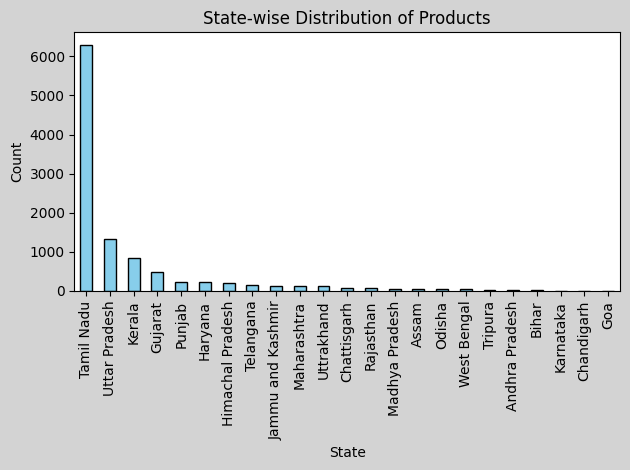

In [3]:
plt.figure(facecolor='lightgrey')

df['State'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('State-wise Distribution of Products')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


Finding the mode as it is the only way to analyse the data :


In [28]:
values_State = df['State'].value_counts()

mode = df['State'].mode()[0]

print(f"Mode: {mode} - {values_State[mode]}")

Mode: Tamil Nadu - 6300


Interpretation :

The analysis of the "State" variable reveals that the mode is Tamil Nadu, which occurs 6300 times in the dataset. This indicates that Tamil Nadu is the most frequently represented state among the observations.

##### Plotting Barplot of District

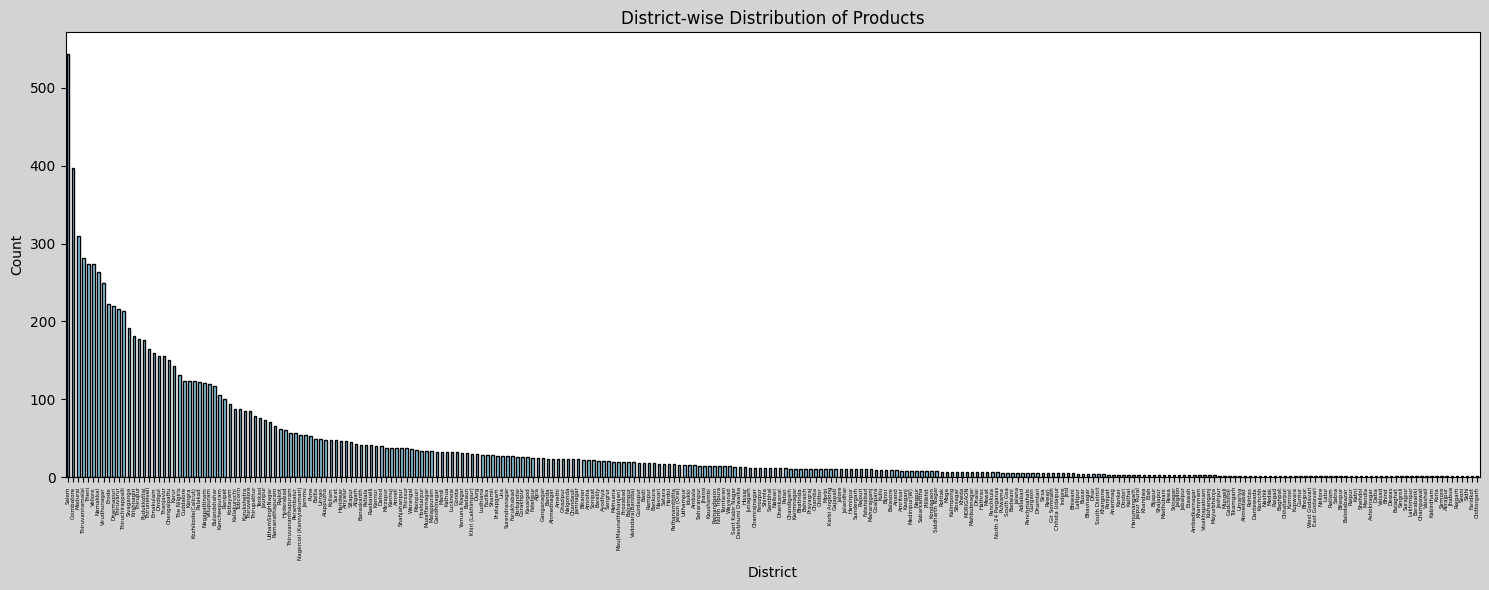

In [5]:
plt.figure(facecolor='lightgrey',figsize=(15,6))

df['District'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('District')
plt.ylabel('Count')
plt.title('District-wise Distribution of Products')

plt.xticks(rotation=90,fontsize=4)

plt.tight_layout()

plt.show()

Finding the mode as it is the only way to analyse the data :


In [29]:

values_District = df['District'].value_counts()

mode = df['District'].mode()[0]

print(f"Mode: {mode} - {values_District[mode]}")


Mode: Salem - 544


Interpretation:

The analysis of the "District" variable reveals that the mode is Salem, which occurs 544 times in the dataset. This indicates that Salem is the most frequently represented district among the observations.

##### Plotting Barplot of Market

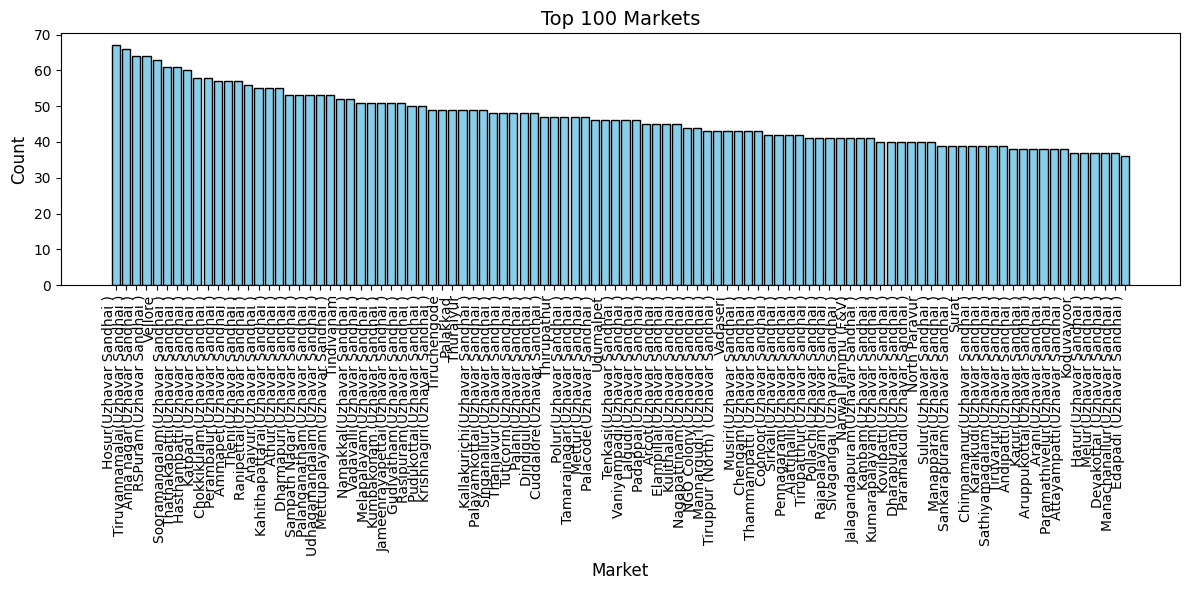

In [6]:
market_counts = df['Market'].value_counts().reset_index()

market_counts.columns = ['Market', 'count']

df_sorted = market_counts.sort_values(by='count', ascending=False)

top_20 = df_sorted.iloc[:100]

# others = pd.DataFrame({'Market': ['Others'], 'count': [df_sorted.iloc[20:]['count'].sum()]})

# top_20_combined = pd.concat([top_20, others]).reset_index(drop=True)
top_20_combined = top_20

plt.figure(figsize=(12, 6))

plt.bar(top_20_combined['Market'], top_20_combined['count'], color='skyblue', edgecolor='black')

plt.xlabel('Market', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 100 Markets', fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=10)

plt.tight_layout()

plt.show()


Finding the mode as it is the only way to analyse the data :

In [27]:

values_Market = df['Market'].value_counts()

mode = df['Market'].mode()[0]

print(f"Mode: {mode} - {values_Market[mode]}")


Mode: Hosur(Uzhavar Sandhai ) - 67


Interpretation:

The analysis of the "Market" variable reveals that the mode is Hosur (Uzhavar Sandhai), which occurs 67 times in the dataset. This indicates that Hosur (Uzhavar Sandhai) is the most frequently represented market among the observations.

##### Plotting Barplot of Commodity

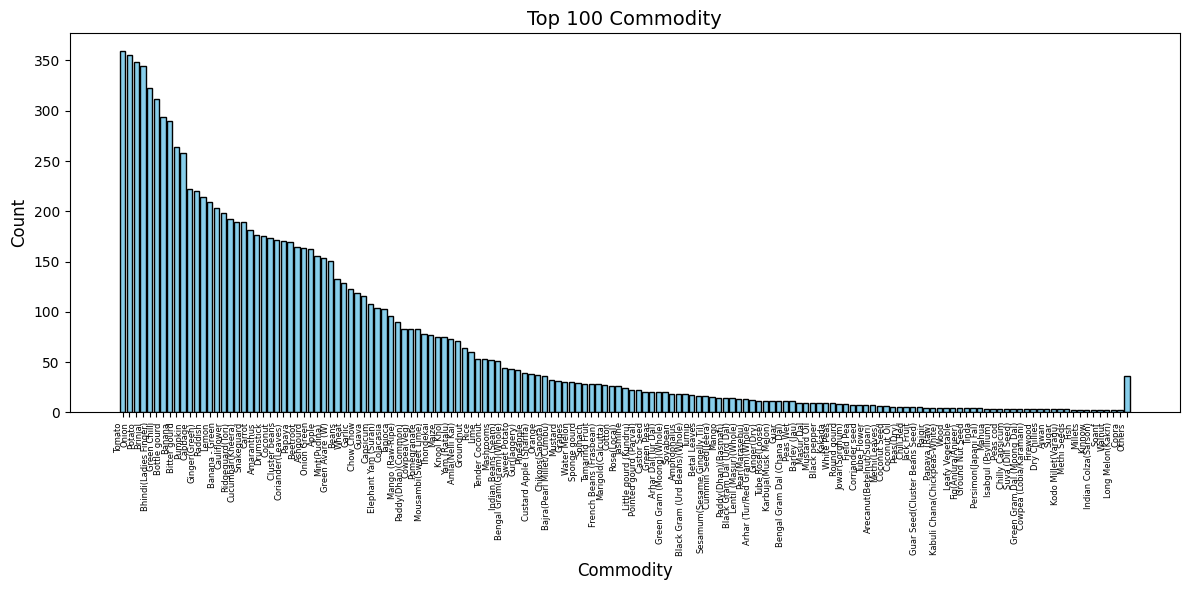

In [7]:
market_counts = df['Commodity'].value_counts().reset_index()

market_counts.columns = ['Commodity', 'count']

df_sorted = market_counts.sort_values(by='count', ascending=False)

top_20 = df_sorted.iloc[:150]

others = pd.DataFrame({'Commodity': ['Others'], 'count': [df_sorted.iloc[150:]['count'].sum()]})

top_20_combined = pd.concat([top_20, others]).reset_index(drop=True)
# top_20_combined = top_20

plt.figure(figsize=(12, 6))

plt.bar(top_20_combined['Commodity'], top_20_combined['count'], color='skyblue', edgecolor='black')

plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 100 Commodity', fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=6)

plt.tight_layout()

plt.show()


Finding the mode as it is the only way to analyse the data :

In [26]:
values_commodity = df['Commodity'].value_counts()

mode = df['Commodity'].mode()[0]

print(f"Mode: {mode} - {values_commodity[mode]}")


Mode: Tomato - 359


Interpretation:

The analysis of the "Commodity" variable reveals that the mode is Tomato, which occurs 359 times in the dataset. This indicates that Tomato is the most frequently represented commodity among the observations.

##### Plotting Barplot of Min Price

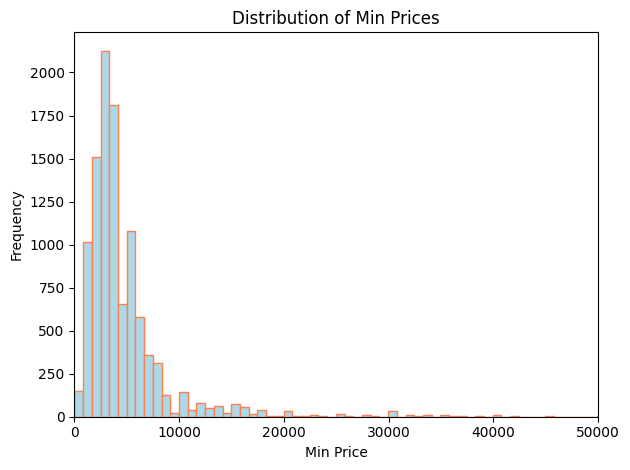

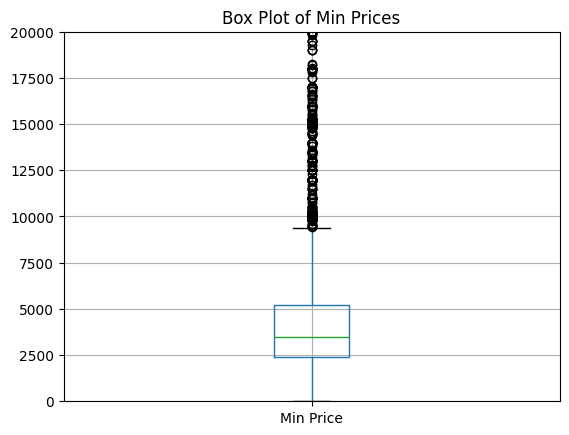

In [9]:
df['Min Price'].plot(kind='hist', bins= 250 , color='lightblue' , edgecolor= 'coral')
plt.xlim(0 , 50000)
plt.title('Distribution of Min Prices')
plt.xlabel('Min Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

df.boxplot(column='Min Price')
plt.ylim(0 , 20000)
plt.title('Box Plot of Min Prices')
plt.show()


Calculating the Measures of Central Tendency and Measure of Dispersion

In [10]:
mean_values = df[['Min Price']].mean()
median_values = df[['Min Price']].median()
mode_values = df[['Min Price']].mode().iloc[0]

range_values = df[['Min Price', ]].max() - df[['Min Price']].min()
variance_values = df[['Min Price']].var()
std_dev_values = df[['Min Price']].std()

summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

print(summary_stats)

                  Mean  Median    Mode     Range      Variance  \
Min Price  4850.914067  3500.0  3000.0  207997.0  3.593446e+07   

           Standard Deviation  
Min Price         5994.535977  


Interpretation: 

They are numerial variable with numeric property.Hence, we can find Measures of Central Tendency and Dispersion.

The statistical summary of the "Min Price" reveals several key insights: Mean (4850.91) indicates a relatively high average minimum price across commodities; Median (3500.0) suggests that half of the minimum prices fall below this value, indicating a clustering around this point; Mode (3000.0) identifies 3000.0 as the most frequently occurring minimum price. A substantial Range (207997.0) highlights significant variability in minimum pricing among commodities. The Variance (3.593446e+07) and Standard Deviation (5994.54) indicate a wide dispersion of minimum prices, suggesting considerable variability. Overall, the distribution appears right-skewed, as evidenced by the higher mean compared to the median, and the common price point of 3000.0 can inform competitive pricing strategies. Examining low outliers may yield additional insights into market dynamics

##### Plotting Barplot of Max Price

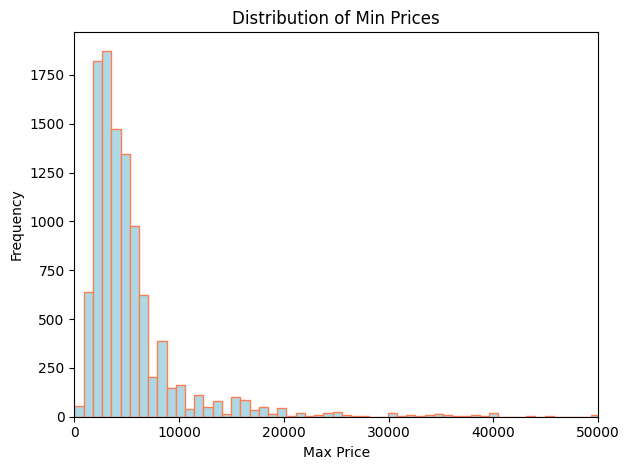

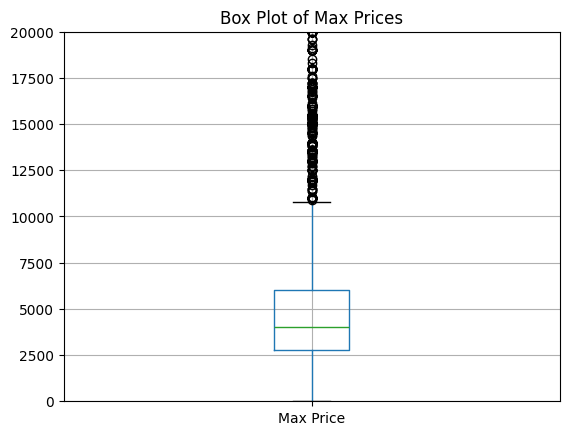

In [11]:
df['Max Price'].plot(kind='hist', bins= 250 , color='lightblue' , edgecolor= 'coral')
plt.xlim(0 , 50000)
plt.title('Distribution of Min Prices')
plt.xlabel('Max Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plot for Min Price
df.boxplot(column='Max Price')
plt.ylim(0 , 20000)
plt.title('Box Plot of Max Prices')
plt.show()

Calculating the Measures of Central Tendency and Measure of Dispersion

In [12]:
mean_values = df[['Max Price']].mean()
median_values = df[['Max Price']].median()
mode_values = df[['Max Price']].mode().iloc[0]

range_values = df[['Max Price', ]].max() - df[['Max Price']].min()
variance_values = df[['Max Price']].var()
std_dev_values = df[['Max Price']].std()

summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

print(summary_stats)

                  Mean  Median    Mode     Range      Variance  \
Max Price  5564.890879  4000.0  4000.0  219995.0  4.316278e+07   

           Standard Deviation  
Max Price         6569.838873  


Interpretation: 

They are numerial variable with numeric property.Hence, we can find Measures of Central Tendency and Dispersion.

The statistical summary of the "Max Price" provides several important insights: Mean (5564.89) indicates a high average maximum price across commodities; Median (4000.0) suggests that half of the maximum prices are below this point, indicating clustering around this value; Mode (4000.0) further emphasizes 4000.0 as a frequently occurring price point. A significant Range (219995.0) highlights substantial variability in maximum pricing among commodities. The Variance (4.316278e+07) and Standard Deviation (6569.84) demonstrate a wide dispersion of maximum prices, suggesting considerable variability. Overall, the distribution appears right-skewed, as indicated by the higher mean compared to the median, and the common price point of 4000.0 can serve as a reference for competitive pricing strategies. Investigating high outliers may provide further insights into market dynamics.

##### Plotting Barplot of Modal Price

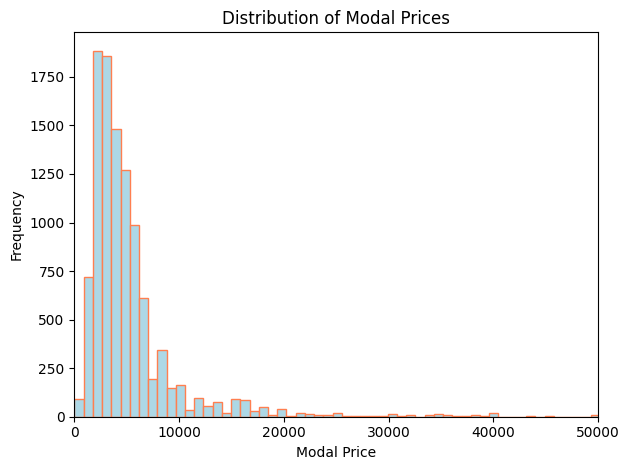

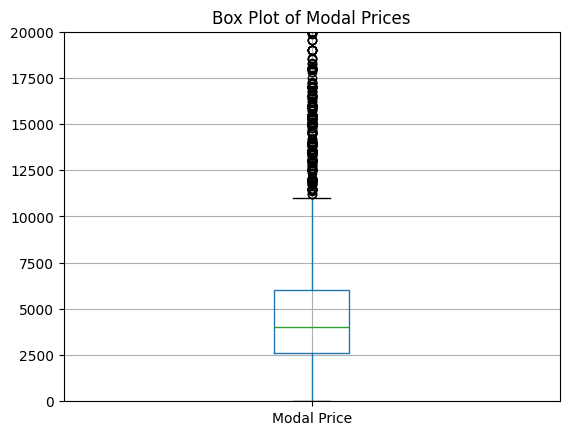

In [13]:
df['Modal Price'].plot(kind='hist', bins= 250 , color='lightblue' , edgecolor= 'coral')
plt.xlim(0 , 50000)
plt.title('Distribution of Modal Prices')
plt.xlabel('Modal Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

df.boxplot(column='Modal Price')
plt.ylim(0 , 20000)
plt.title('Box Plot of Modal Prices')
plt.show()

Calculating the Measures of Central Tendency and Measure of Dispersion

In [14]:
mean_values = df[['Modal Price']].mean()
median_values = df[['Modal Price']].median()
mode_values = df[['Modal Price']].mode().iloc[0]

range_values = df[['Modal Price', ]].max() - df[['Modal Price']].min()
variance_values = df[['Modal Price']].var()
std_dev_values = df[['Modal Price']].std()

summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

print(summary_stats)

                    Mean  Median    Mode     Range      Variance  \
Modal Price  5431.351337  4000.0  4000.0  219995.0  4.172042e+07   

             Standard Deviation  
Modal Price         6459.134886  


Interpretation: 

They are numerial variable with numeric property.Hence, we can find Measures of Central Tendency and Dispersion.

The statistical summary of the "Modal Price" reveals several key insights: Mean (5431.35) indicates a generally high average price across commodities; Median (4000.0) shows that half of the prices fall below this point, suggesting clustering around this value; Mode (4000.0) reinforces 4000.0 as a common price point. A significant Range (219995.0) highlights considerable variability in pricing among commodities. The Variance (4.172042e+07) and Standard Deviation (6459.13) indicate a wide dispersion of modal prices, emphasizing variability. Overall, the distribution appears right-skewed, with a higher mean than median, and the common price point of 4000.0 can inform competitive pricing strategies. Investigating high outliers will enhance understanding of market dynamics.

# Multivariate Analysis

To perform MA we will perform analysis of any relations present between:

(i) Categorical & Categorical

(ii) Numerical & Numerical

(iii) Categorical & Numerical

### (i) Categorical & Categorical


In [15]:
def chi_square_test(col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])  # Create contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Perform Chi-square test
    print(f'Chi-square Statistic for {col1} and {col2}: {chi2}')
    print(f'p-value: {p}')
    print('-' * 50)

# Chi-square test for different combinations of categorical variables
chi_square_test('State', 'District')
chi_square_test('State', 'Market')
chi_square_test('State', 'Commodity')
chi_square_test('District', 'Market')
chi_square_test('District', 'Commodity')
chi_square_test('Market', 'Commodity')

Chi-square Statistic for State and District: 232562.0
p-value: 0.0
--------------------------------------------------
Chi-square Statistic for State and Market: 229859.6060656478
p-value: 0.0
--------------------------------------------------
Chi-square Statistic for State and Commodity: 23234.831335820527
p-value: 0.0
--------------------------------------------------
Chi-square Statistic for District and Market: 2927856.6446895045
p-value: 0.0
--------------------------------------------------
Chi-square Statistic for District and Commodity: 132366.59867369794
p-value: 0.0
--------------------------------------------------
Chi-square Statistic for Market and Commodity: 177927.96592844298
p-value: 0.0
--------------------------------------------------


Interpretation :

(i) State and District:
The Chi-square test result, with a statistic of 232,562.0 and a p-value of 0.0, indicates a significant association between State and District. The extremely low p-value allows us to reject the null hypothesis, meaning that the distribution of districts is not independent of states. This implies that districts are strongly tied to specific states, as expected, reflecting regional divisions.

(ii) State and Market:
The Chi-square test result, with a statistic of 229,859.61 and a p-value of 0.0, shows a significant relationship between State and Market. The p-value being 0.0 suggests that the distribution of markets across states is not independent, meaning that certain markets are specific to particular states.

(iii) State and Commodity:
The Chi-square test result, with a statistic of 23,234.83 and a p-value of 0.0, indicates a significant association between State and Commodity. This suggests that the distribution of commodities varies significantly across states. Certain commodities are more commonly associated with specific states, reflecting regional market dynamics.

(iv) District and Market:
The Chi-square test result, with a statistic of 2,927,856.64 and a p-value of 0.0, indicates a very strong association between District and Market. The low p-value allows us to reject the null hypothesis, meaning that the distribution of markets is heavily influenced by districts, showing that markets are localized within specific districts.

(v) District and Commodity:
The Chi-square test result, with a statistic of 132,366.60 and a p-value of 0.0, indicates a significant relationship between District and Commodity. The distribution of commodities is not independent of districts, implying that certain commodities are more common or important in specific districts.

(vi) Market and Commodity:
The Chi-square test result, with a statistic of 177,927.97 and a p-value of 0.0, shows a strong association between Market and Commodity. The distribution of commodities is dependent on the market, meaning different markets specialize in different types of commodities.

In all cases, the p-value of 0.0 implies a highly significant relationship, meaning the variables are not independent and have strong associations.

### (ii) Numerical & Numerical


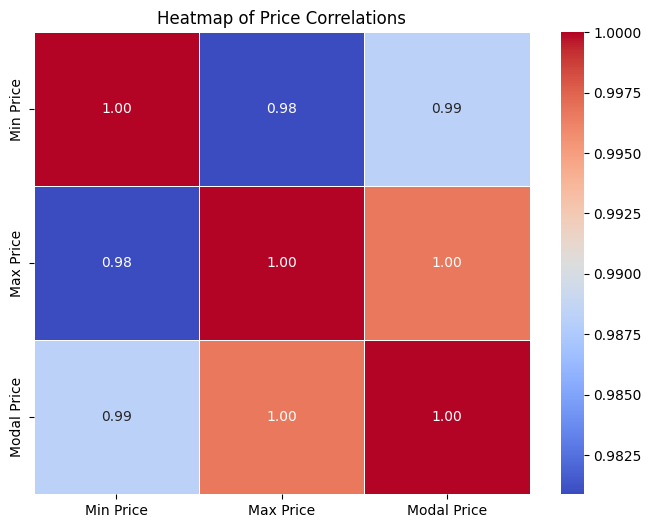

In [16]:
corr = df[['Min Price', 'Max Price', 'Modal Price']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Price Correlations')
plt.show()

Interpretation:

Since all three price variables are so closely correlated, they might be measuring almost the same underlying trend in prices, with only small variations.

There is very little independent variation among these variables. This means that one price variable can be used to predict the others with high accuracy, especially Max Price and Modal Price, which are almost identical.

### (iii) Categorical & Numerical

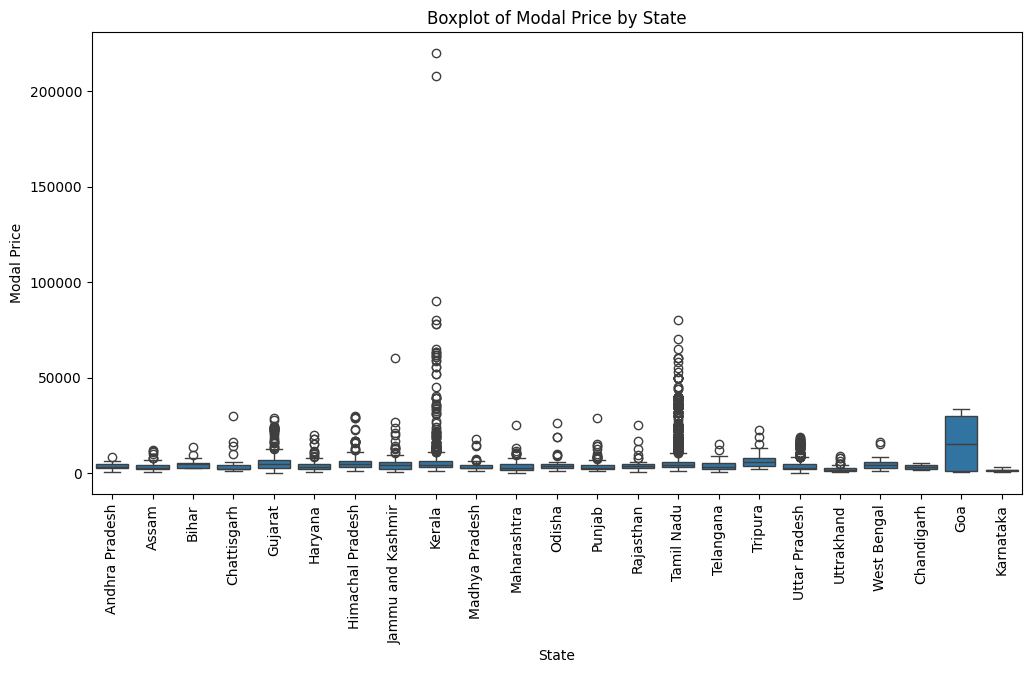

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Modal Price', data=df)
plt.xticks(rotation=90)  
plt.title('Boxplot of Modal Price by State')
plt.show()

Interpretation: 

The boxplot of Modal Price by State reveals significant regional disparities in pricing across different states in India. States like Kerala, Maharashtra, and Tamil Nadu exhibit higher median modal prices, indicating that commodities in these regions tend to be more expensive. Conversely, states such as Andhra Pradesh, Assam, and Bihar show lower median prices, suggesting more affordable commodities. The presence of numerous outliers in several states highlights instances of exceptionally high prices, indicating potential market anomalies or high-value commodities. Overall, the plot underscores the variability in modal prices and can inform decisions regarding market strategies and pricing analysis.

In [18]:
states = df['State'].unique()
data = [df[df['State'] == state]['Modal Price'] for state in states]
F_statistic, p_value = f_oneway(*data)
print(f'F-statistic: {F_statistic}, p-value: {p_value}')


F-statistic: 14.644428571036586, p-value: 3.15940752135717e-54


Interpretation :

The results of the ANOVA analysis indicate a statistically significant difference in Modal Prices across the various states in the dataset, as evidenced by an F-statistic of approximately 14.64 and a p-value of 3.16e-54. This extremely low p-value suggests that the probability of observing such differences purely by chance is negligible, allowing us to reject the null hypothesis, which posits no significant differences among the groups. Consequently, it can be concluded that at least one state exhibits a modal price that differs significantly from the others. This finding underscores the importance of regional factors influencing commodity pricing and highlights the need for further investigation into which specific states are contributing to these differences. Further post-hoc tests, such as Tukey's HSD, could provide deeper insights into the nature and extent of these price variations among states.